<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



# **Homework 2 (Zixuan Li):**


---


- Please complete each of the problems below
- Show all your code to complete each question
- Provide sentence(s) explaining your solution



It is recommended that you read chapters 8, 9, and 10 to prepare for this module!

**Please use the following dataset for problems 1 - 6**





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import sklearn
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


URL_Framingham_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Training'
URL_Framingham_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Test'

Framingham_test = pd.read_csv('https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Test')
Framingham_training = pd.read_csv('https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Training')


##Use training data set to answer questions below

Framingham_test


,Index,Sex,Age,Educ,Death
0,4,2,52,2,0
1,6,1,48,1,0
2,10,2,46,3,0
3,14,2,49,2,0
4,16,2,63,1,0
...,...,...,...,...,...
2252,11307,2,56,1,0
2253,11313,1,68,1,1
2254,11323,2,50,1,1
2255,11326,2,58,2,0


**1. Convert Death, Sex, and education to factors**





In [2]:
categ = ['Death', 'Sex', 'Educ']
for i in categ:
  Framingham_training[i] = Framingham_training[i].astype('category')
Framingham_training.dtypes

Index       int64
Sex      category
Age         int64
Educ     category
Death    category
dtype: object

I used .astype() method and a for loop to change the data type of these fields to categorical.

**2. Create 2 contingency tables, one with death and sex and another with death and educ**

In [3]:
ct1 = pd.crosstab(Framingham_training['Death'], Framingham_training['Sex'], margins=True)
print(ct1)
ct2 = pd.crosstab(Framingham_training['Death'], Framingham_training['Educ'], margins=True)
print(ct2)

Sex       1     2   All
Death                  
0      2113  3422  5535
1      1324  1094  2418
All    3437  4516  7953
Educ      1     2     3    4   All
Death                             
0      2060  1825   960  690  5535
1      1244   603   346  225  2418
All    3304  2428  1306  915  7953


I used the .crosstab() method in pandas package to create these contingency tables, by assigning margins=True, the subtotals will be shown in the results.

**3. Use the tables in previous exercise to calculate**

1.   The probability a randomly selected person is alive or dead
2.   The probability a randomly selected person is male
3.   The probability a randomly selected person has an Educ value of 3
4.   The probabilities that a dead person is male with education level 1, and that a living person is male with education level 1
5.   the probabilities that a living person is female withe education level 2, and that a dead person is female with education level 2

In [4]:
prob1 = ct1['All'][1]/ct1['All']['All']
prob2 = ct1[1]['All']/ct1['All']['All']
prob3 = ct2[3]['All']/ct2['All']['All']
prob4_1 = ct1[1][1]/ct1['All'][1]*ct2[1][1]/ct2['All'][1]
prob4_2 = ct1[1][0]/ct1['All'][0]*ct2[1][0]/ct2['All'][0]
prob5_1 = ct1[2][0]/ct1['All'][0]*ct2[2][0]/ct2['All'][0]
prob5_2 = ct1[2][1]/ct1['All'][1]*ct2[2][1]/ct2['All'][1]
print(f'''The probability that a randomly selected person is dead is {round(prob1*100, 2)}%.''')
print(f'''The probability that a randomly selected person is male is {round(prob2*100, 2)}%, assuming 1 represents male.''')
print(f'''The probability that a randomly selected person has an Educ value of 3 is {round(prob3*100, 2)}%.''')
print(f'''The probability that a dead person is male with education level 1 is {round(prob4_1*100, 2)}%.''')
print(f'''The probability that a living person is male with education level 1 is {round(prob4_2*100, 2)}%.''')
print(f'''The probability that a living person is female with education level 2 is {round(prob5_1*100, 2)}%.''')
print(f'''The probability that a dead person is female with education level 2 is {round(prob5_2*100, 2)}%.''')

The probability that a randomly selected person is dead is 30.4%.
The probability that a randomly selected person is male is 43.22%, assuming 1 represents male.
The probability that a randomly selected person has an Educ value of 3 is 16.42%.
The probability that a dead person is male with education level 1 is 28.17%.
The probability that a living person is male with education level 1 is 14.21%.
The probability that a living person is female with education level 2 is 20.38%.
The probability that a dead person is female with education level 2 is 11.28%.


1.   P(dead) = dead/all
2.   P(male) = male/all (assuming 1 represents male)
3.   P(Educ3) = Educ3/All
4.   P(dead is male&Educ1) = P(dead is male)*P(dead is Educ1)

  P(living is male&Educ1) = P(living is male)*P(living is Educ1)
5.   P(living is female&Educ2) = P(living is female)*P(living is Educ2)

  P(dead is female&Educ2) = P(dead is female)*P(dead is Educ2)

**4. Create side-by-side bar graphs for death, one with an overlay of Sex and the other with an overlay of Educ**

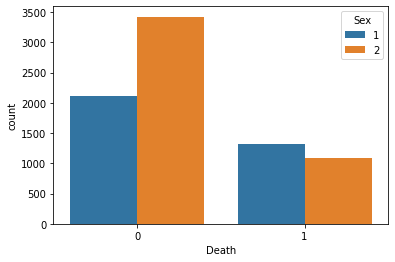

In [5]:
# Barplot Death Overlay Sex
sns.countplot(x = 'Death', hue = 'Sex', data = Framingham_training)

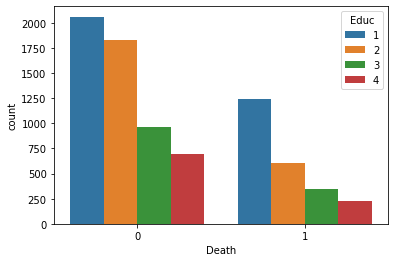

In [6]:
# Barplot Death Overlay Educ
sns.countplot(x = 'Death', hue = 'Educ', data = Framingham_training)

I used the .countplot() method in seaborn package to produce these plots. Setting hue equals the overlay variable and dodge=True (which is by default) allows to plot a side-by-side bar graph with comparing different attributes of the varible.

**5. Compute the posterior probability of Death=0 (person is living) for a female with education level 2.  Compute the posterior probability of death =1 (person is dead) for a male with education level 1.**



In [7]:
prob6 = prob5_1*(1-prob1)/(ct1[2]['All']/ct1['All']['All'])/(ct2[2]['All']/ct2['All']['All'])
prob7 = prob4_1*prob1/(ct1[1]['All']/ct1['All']['All'])/(ct2[1]['All']/ct2['All']['All'])
print(f'''The probabilities are {round(prob6*100, 2)}%, {round(prob7*100, 2)}% respecitively.''')

The probabilities are 81.84%, 47.7% respecitively.


P(living|female&Educ2) = P(female&Educ2|living)*P(living)/P(female&Educ2)

P(dead|male&Educ1) = P(male&Educ1|dead)*P(dead)/P(male&Educ1)





**6. Run the Naive Bayes model on the data set.  Display the results in a contingency table.  Edit the rows and column names of the table to make the table more readable.  Include a total row and column.**

In [8]:
# Subset independent and dependent variables for training and test dataset
X_train = Framingham_training[['Sex', 'Educ', 'Age']]
y_train = Framingham_training[['Death']]
X_test = Framingham_test[['Sex', 'Educ', 'Age']]
y_test = Framingham_test[['Death']]

# Fit Naive Bayes Model
NB = GaussianNB()  
nb_01 = NB.fit(X_train, y_train)

# Predict and Display Accuracy
y_predict = nb_01.predict(X_test)  
print("Test accuracy (Naive Bayes) =", nb_01.score(X_test,y_test))

Test accuracy (Naive Bayes) = 0.7372618520159504


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Fit Dummy Classifier Model As A Baseline Model
dummy = DummyClassifier(strategy=  "prior")
dumb = dummy.fit(X_train,y_train)

# Predict and Display Baseline Accuracy
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)
print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (Dummy Classifier) = 0.7075764288879043


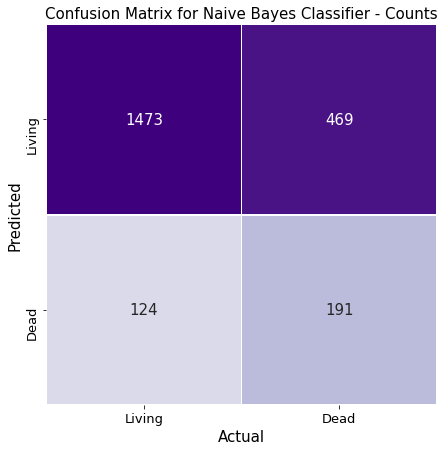

In [10]:
# Generate Confusion Matrix For NB Model
cm_nb = confusion_matrix(y_test, y_predict)
cm_nb_df = pd.DataFrame(cm_nb)

# Plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_nb_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(['Living', 'Dead'], fontsize=13)
ax.set_yticklabels(['Living', 'Dead'], fontsize=13)
plt.title("Confusion Matrix for Naive Bayes Classifier - Counts", fontsize=15)
plt.show()

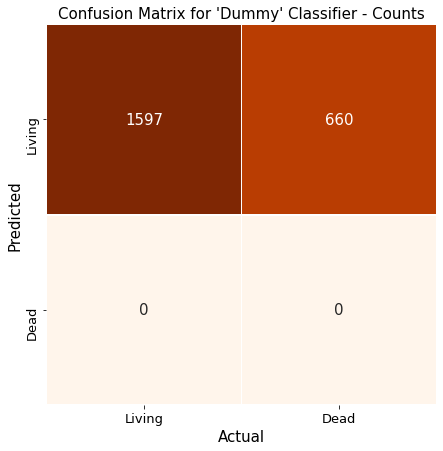

In [11]:
# Generate Confusion Matrix For Dummy Classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
cm_dummy_df = pd.DataFrame(cm_dummy)

# Plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(['Living', 'Dead'], fontsize=13)
ax.set_yticklabels(['Living', 'Dead'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)
plt.show()

By comparing the accuracy of Naive Bayes model and dummy classifier, the performance of the NB model did not improved very much from the baseline. Since the dataset is unbalanced with 70% of records in the living category, the dummy classifier which predicts all records as living has a high performance.

**Please use the following dataset for problems 7 - 9**

In [12]:
url_cereals='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/cereals.CSV'
cereals=pd.read_csv(url_cereals)

cereals

### Dataset to be provided by 5/18 11:55pm

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,1,0,0,0,1,0,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,1,0,0,0,1,0,0
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,1,0,0,0,0,1,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,1,0,0,0,1,0,0


**7. Subset the Fat and Sodium variables into their own data frame, X.  Standardize the data set**


In [13]:
# Subset X Dataframe
X = cereals[['Fat', 'Sodium']]

# Standardize The Dataset
Xz = pd.DataFrame()
Xz['Fat'] = stats.zscore(X['Fat'])
Xz['Sodium'] = stats.zscore(X['Sodium'])

After subsetting the Fat and Sodium variables, I used the .zscore() method in the scipy package to standardize the variables.

**8. Run k-means clustering on the data set, usng three clusters**

In [14]:
kmeans01=KMeans(n_clusters=3).fit(Xz)

# Save the cluster membership
cluster=kmeans01.labels_

# Separate the records
Cluster1=Xz.loc[cluster == 0]
Cluster2=Xz.loc[cluster == 1]
Cluster3=Xz.loc[cluster == 2]

I used KMeans in the Skleran package to fit the K-means clustering model, and .labels_ function to get the labels of each cluster.

**9. Obtain the summary of each variable witin each cluster and use the summaries to identify:**



1.   A low fat, low sodium cluster
2.   A low fat, high sodium cluster
3.   A high fat, high sodium cluster  



In [15]:
Cluster1.describe()

,Fat,Sodium
count,14.000000,14.000000
mean,-0.727334,-1.659901
std,0.611301,0.410850
min,-1.013072,-1.917189
25%,-1.013072,-1.917189
50%,-1.013072,-1.917189
75%,-1.013072,-1.466934
max,0.987096,-0.836578


In [16]:
Cluster2.describe()

,Fat,Sodium
count,19.000000,19.000000
mean,1.408184,0.063932
std,0.768598,0.739608
min,0.987096,-1.737087
25%,0.987096,-0.236238
50%,0.987096,0.003898
75%,1.987181,0.604238
max,3.987349,1.564782


In [17]:
Cluster3.describe()

,Fat,Sodium
count,44.000000,44.000000
mean,-0.376655,0.500543
std,0.486648,0.596188
min,-1.013072,-0.416340
25%,-1.013072,0.123966
50%,-0.012988,0.484170
75%,-0.012988,0.874391
max,-0.012988,1.924986


By looking at the mean values of each cluster groups, we are able to determine whether it is a low or high category in each variable. Since we trained the model with standardized z values, if it's positive, it means the average of the cluster is higher than that of all the records, and it's in the high category. On the other hand, if it's negative, it means the average of the cluster is lower than that of all the records, and it's in the low category.

Therefore, low fat low sodium is cluster 2, low fat high sodium is cluster 3, and high fat high sodium is cluster 1.